# Análise de Resultados

In [37]:
!pip install --quiet pandas
!pip install --quiet matplotlib

In [38]:
from pathlib import Path
from enum import Enum

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [39]:
RESULTS_DIR = 'results'
APP = 'online-boutique'
REQUESTS_CSV_FILE_ENDING = '_requests.csv'

class Instance(Enum):
    Base = 'base'
    Istio = 'istio'

class Test(Enum):
    Test_100 = '100-10-5m'
    Test_500 = '500-20-5m'
    Test_1000 = '1000-50-5m'

result_dir = lambda inst, test: \
    Path.cwd() / RESULTS_DIR / f'{APP}_{inst.value}__{test.value}'

def import_requests_csv(path) -> pd.DataFrame:
    """
    Import all CSV files in the given path and concatenate them into a single DataFrame.
    :param path: Path to the directory containing CSV files.
    :return: A DataFrame containing the concatenated data from all CSV files.
    """
    path = Path(path)
    if not path.exists():
        raise FileNotFoundError(f"Path {path} does not exist.")
    if not path.is_dir():
        raise NotADirectoryError(f"Path {path} is not a directory.")

    csv_files = path.glob(F'*{REQUESTS_CSV_FILE_ENDING}')
    dfs = [ pd.read_csv(csv_file) for csv_file in csv_files ]
    if dfs:
        return pd.concat(dfs, ignore_index=True)
    else:
        return pd.DataFrame()

In [40]:
def plot_requests(test: Test):
    """
    Plot the requests for a given test.
    :param test: The test to plot.
    """
    dfs = [import_requests_csv(result_dir(inst, test)) for inst in Instance]
    df_base, df_istio = dfs[0], dfs[1]
    names = df_base['Name']
    x = np.arange(len(names))
    width = 0.35

    plt.figure(figsize=(10, 6))
    plt.barh(x - width/2, df_base['Average Response Time'], height=width, label='Base', alpha=0.7)
    plt.barh(x + width/2, df_istio['Average Response Time'], height=width, label='Istio', alpha=0.7)
    plt.yticks(x, names)
    plt.xlabel('Tempo Médio de Resposta (ms)')
    plt.title('Comparação do Tempo Médio de Resposta (Base x Istio)')
    plt.legend()
    plt.tight_layout()
    plt.show()


### Teste com 100 usuários e ramp up de 10

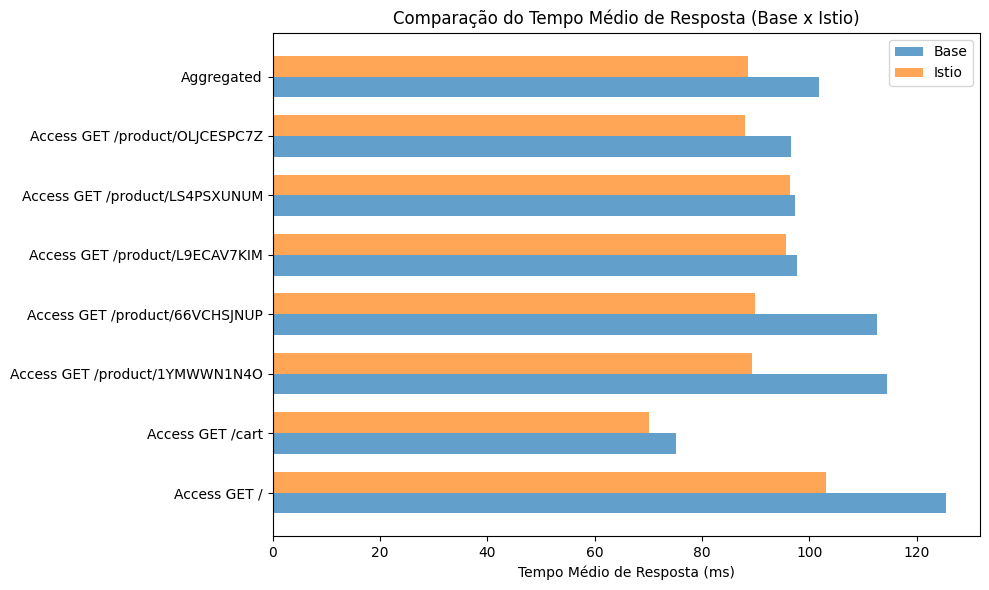

In [41]:
plot_requests(Test.Test_100)

### Teste de 500 usuários e ramp up de 20

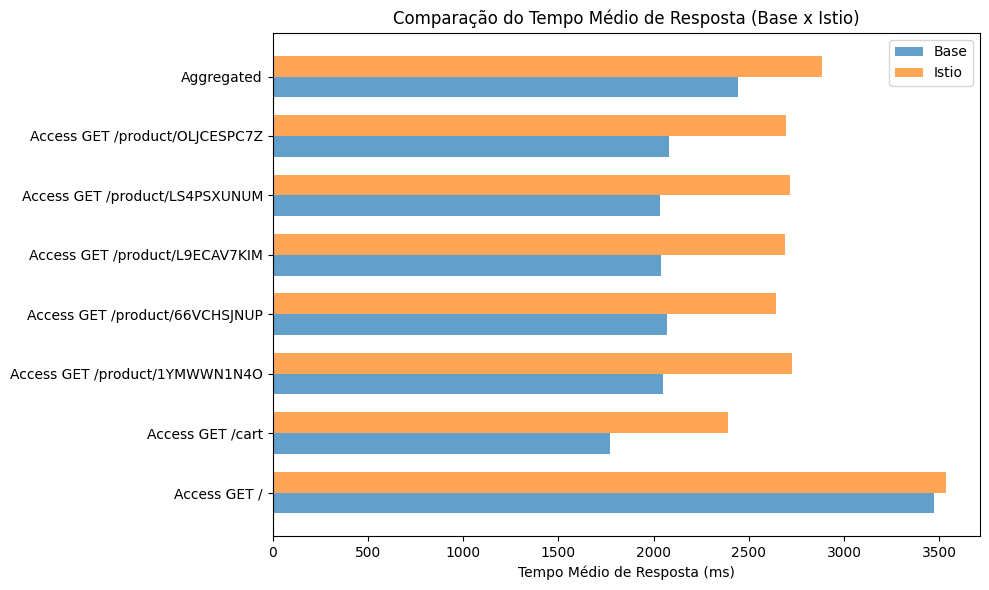

In [45]:
plot_requests(Test.Test_500)

### Teste de 1000 usuários e ramp up de 50

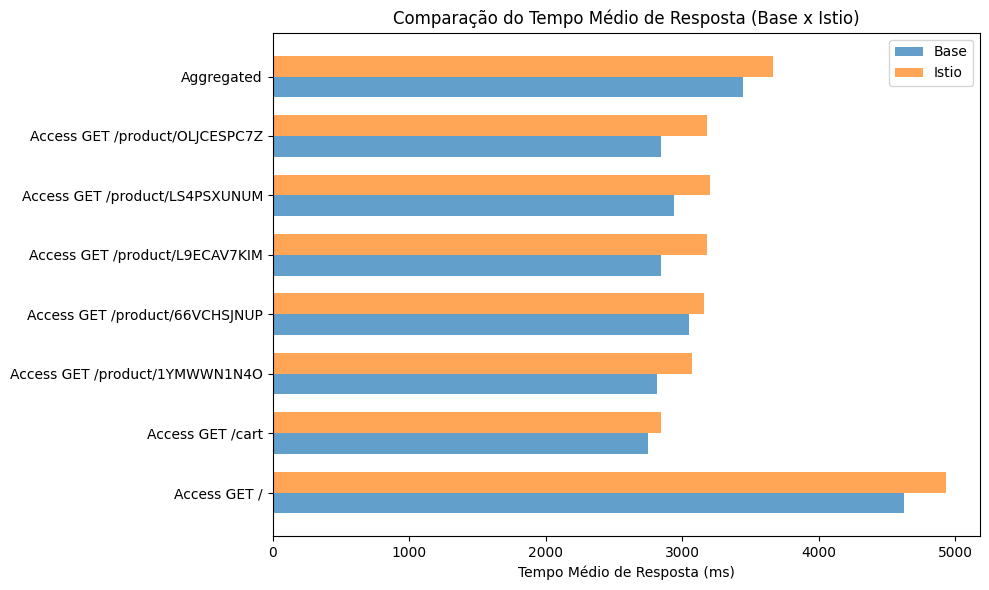

In [46]:
plot_requests(Test.Test_1000)